In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot 
import numpy as np

df = pd.read_excel(open(r'C:\Users\Mhaiskao\Desktop\Assignments\Information Visualization\CW2\Plane and train tickets.xlsx','rb'))
df.head()

,Plane tickets(From),Plane tickets(To),Plane tickets Cost(£),Plane tickets(average time),Train tickets Cost(£),Train tickets(average time ),Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Cardiff,Leicester,175.0,4.25,108.8,3.24,NaN,NaN,NaN
1,Cardiff,Cambridge,175.0,6.14,87.0,4.15,NaN,NaN,NaN
2,Cardiff,London,175.0,4.25,102.0,1.59,NaN,NaN,NaN
3,Cardiff,Newcastle,202.0,4.45,182.4,11.51,NaN,NaN,NaN
4,Cardiff,Manchester,87.8,4.13,42.5,3.34,NaN,NaN,NaN


In [2]:
del(df['Unnamed: 6'])
del(df['Unnamed: 7'])
del(df['Unnamed: 8'])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 6 columns):
Plane tickets(From)             94 non-null object
Plane tickets(To)               94 non-null object
Plane tickets Cost(£)           94 non-null float64
Plane tickets(average time)     87 non-null float64
Train tickets Cost(£)           94 non-null float64
Train tickets(average time )    94 non-null float64
dtypes: float64(4), object(2)
memory usage: 4.5+ KB


In [4]:
df=df.fillna(0)
df.describe()

,Plane tickets Cost(£),Plane tickets(average time),Train tickets Cost(£),Train tickets(average time )
count,94.00000,94.000000,94.000000,94.000000
mean,125.06883,3.375106,78.370106,3.592660
std,79.78150,1.787026,52.781202,5.021065
min,0.00000,0.000000,5.150000,0.350000
25%,76.77000,1.262500,38.370000,2.012500
50%,98.87500,4.130000,64.050000,3.165000
75%,186.87000,4.525000,111.200000,4.187500
max,337.00000,6.140000,230.000000,49.000000


In [5]:
cols = ['Source_City','Destination_City','Plane Tickets','Plane Time','Train Tickets','Train Time']
df.columns=cols

In [6]:
df['Source_City'] = df['Source_City'].str.strip()
df['Destination_City'] = df['Destination_City'].str.strip()

In [7]:
df.head()

,Source_City,Destination_City,Plane Tickets,Plane Time,Train Tickets,Train Time
0,Cardiff,Leicester,175.0,4.25,108.8,3.24
1,Cardiff,Cambridge,175.0,6.14,87.0,4.15
2,Cardiff,London,175.0,4.25,102.0,1.59
3,Cardiff,Newcastle,202.0,4.45,182.4,11.51
4,Cardiff,Manchester,87.8,4.13,42.5,3.34


# Violin Plot -  Outgoing Plane vs Train Prices from Source City

In [8]:
df_violin_source = pd.melt(df, id_vars=['Source_City'], value_vars=['Plane Tickets','Train Tickets'],var_name="type")

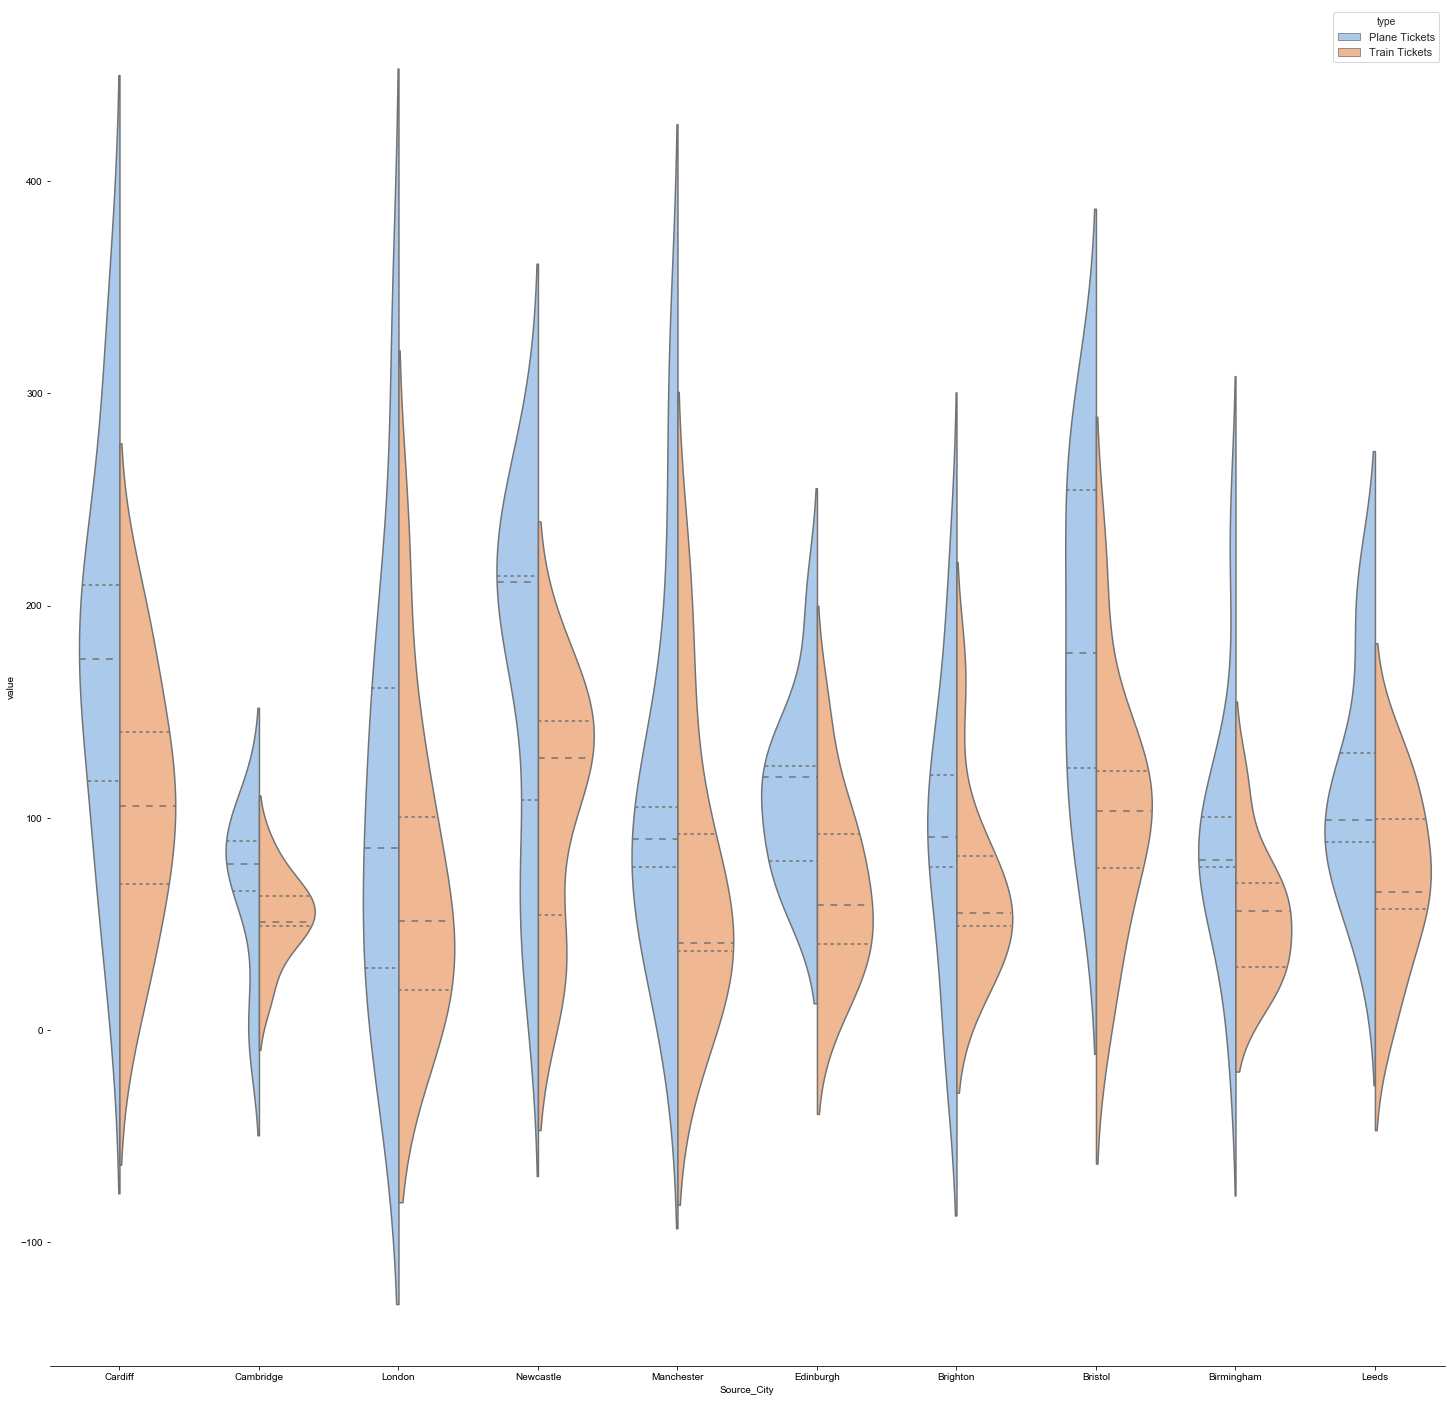

In [9]:
fig, ax = pyplot.subplots(figsize =(25, 25)) 

sns.set(style="whitegrid", palette="pastel", color_codes=True)
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(ax=ax,x="Source_City", y="value", hue="type",
               split=True, inner="quart",
               data=df_violin_source)
sns.despine(left=True)

# Violin Plot -  Incoming Plane vs Train Prices to Destination City

In [10]:
df_violin_destination = pd.melt(df, id_vars=['Destination_City'], value_vars=['Plane Tickets','Train Tickets'],var_name="type")


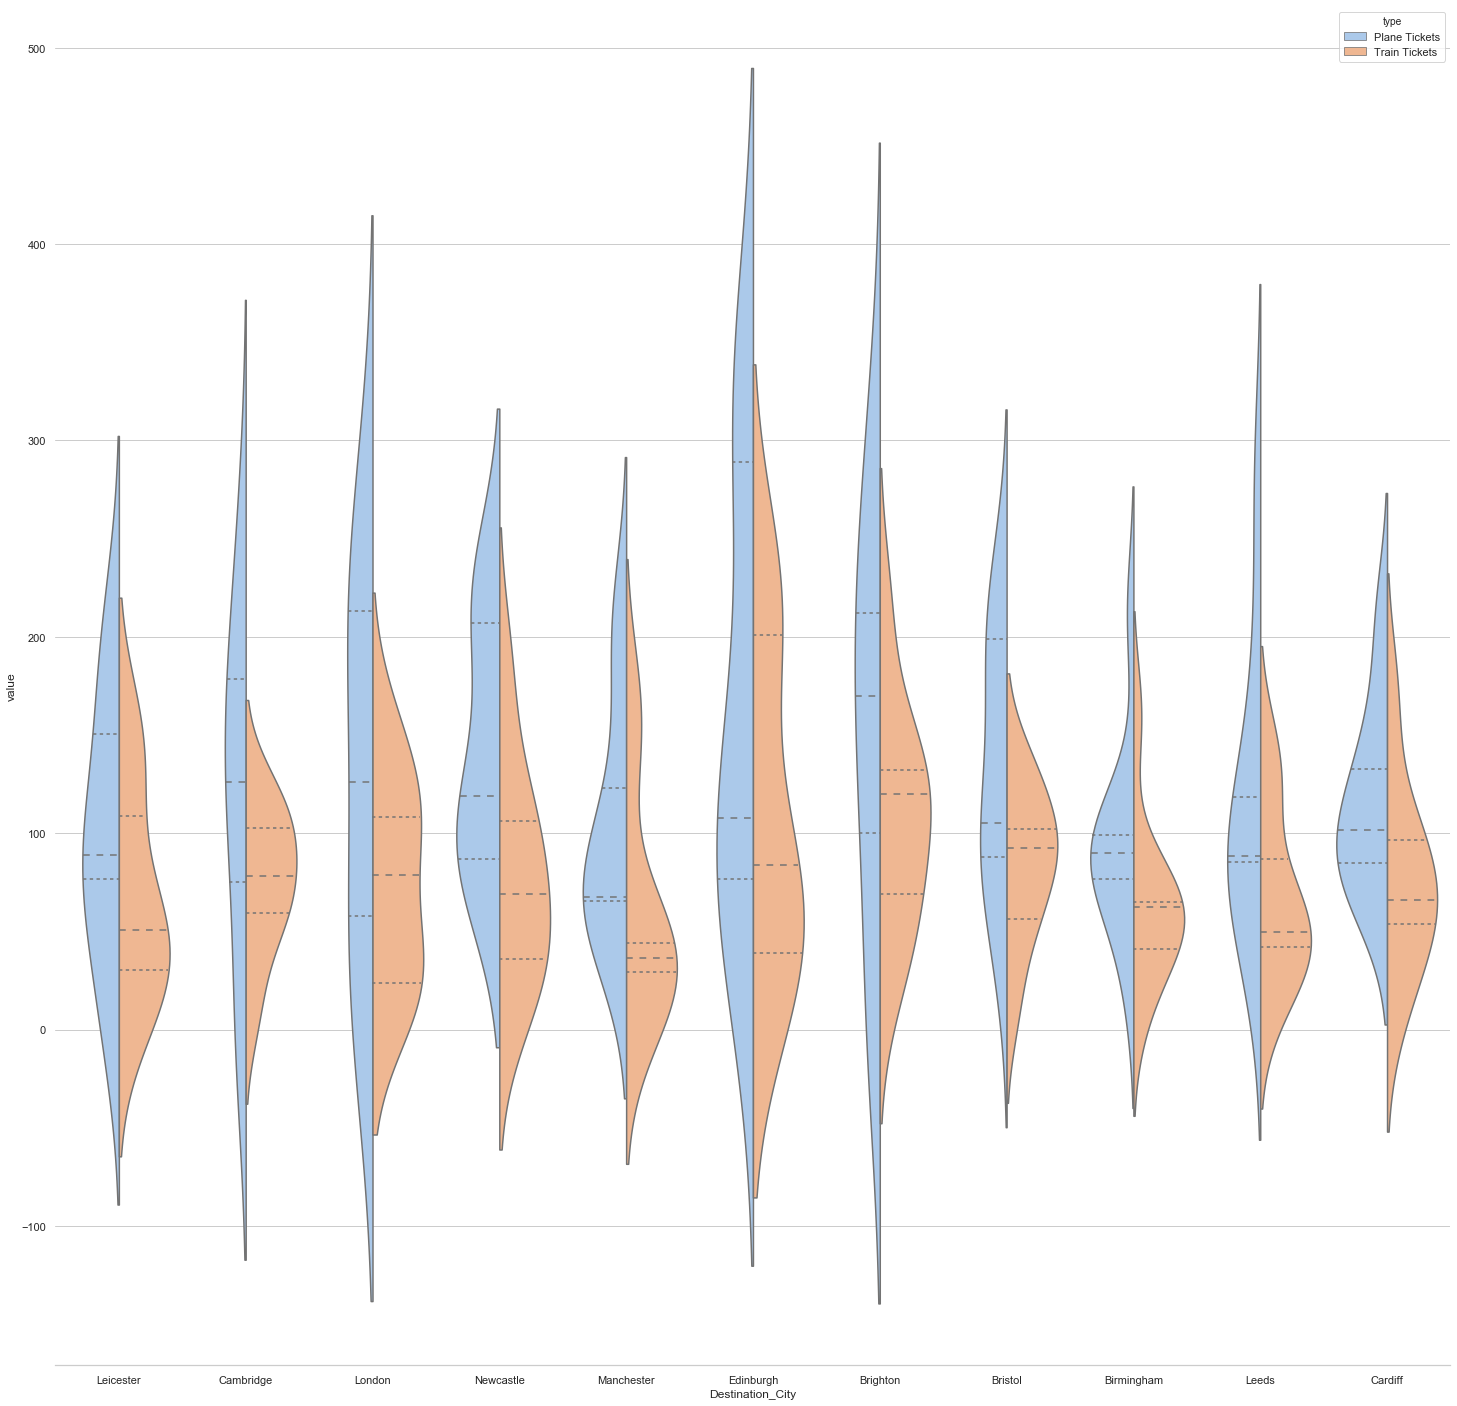

In [11]:
fig, ax = pyplot.subplots(figsize =(25, 25)) 

sns.set(style="whitegrid", palette="pastel", color_codes=True)
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(ax=ax,x="Destination_City", y="value", hue="type",
               split=True, inner="quart",
               data=df_violin_destination)
sns.despine(left=True)

# Sunburst Chart - Plane Tickets from Source to Destination Cities

In [85]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
def input_to_sunburst(labels,parents,value,value_time):
    for i in range(len(parents)):
        x=parents[i].strip()
        parents[i]='S:' + x
        x=labels[i].strip()
        labels[i]='D:' + x

    list2=np.array(parents)
    list3=np.unique(list2)

    for i in range(0,len(list3)):
        parents.insert(0,'City')
        labels.insert(0,list3[i])
        value.insert(0,10)
        value_time.insert(0,10)
        
    parents.insert(0,"")
    labels.insert(0,'City')
    value.insert(0,10)
    value_time.insert(0,10)
    
    return labels,parents,value,value_time

#For plane tickets
labels=list(df['Destination_City'])
parents=list(df['Source_City'])
value=list(df['Plane Tickets'])
value_time=list(df['Plane Time'])

labels,parents,value,value_time=input_to_sunburst(labels,parents,value,value_time)

fig = make_subplots(1, 2, specs=[[{"type": "domain"}, {"type": "domain"}]],)
fig.add_trace(go.Sunburst(
        labels=labels,
        parents=parents,
        values=value,
        hovertemplate="Price(£):<b>%{value}",
        maxdepth=2
    ),1,1)

fig.add_trace(go.Sunburst(
        labels=labels,
        parents=parents,
        values=value_time,
        hovertemplate="Time(Hrs):<b>%{value}",
        maxdepth=2
    ),1,2)

fig.show()

# Sunburst Chart - Train Tickets from Source to Destination Cities

In [86]:
#For Train tickets
labels=list(df['Destination_City'])
parents=list(df['Source_City'])
value=list(df['Train Tickets'])
value_time=list(df['Train Time'])

labels,parents,value,value_time=input_to_sunburst(labels,parents,value,value_time)

fig = make_subplots(1, 2, specs=[[{"type": "domain"}, {"type": "domain"}]],)
fig.add_trace(go.Sunburst(
        labels=labels,
        parents=parents,
        values=value,
        hovertemplate="Price:<b>%{value}",
        maxdepth=2
    ),1,1)

fig.add_trace(go.Sunburst(
        labels=labels,
        parents=parents,
        values=value_time,
        hovertemplate="Price:<b>%{value}",
        maxdepth=2
    ),1,2)

fig.show()

# Scatter Plot

In [98]:
df.head()

,Source_City,Destination_City,Plane Tickets,Plane Time,Train Tickets,Train Time
0,Cardiff,Leicester,175.0,4.25,108.8,3.24
1,Cardiff,Cambridge,175.0,6.14,87.0,4.15
2,Cardiff,London,175.0,4.25,102.0,1.59
3,Cardiff,Newcastle,202.0,4.45,182.4,11.51
4,Cardiff,Manchester,87.8,4.13,42.5,3.34


In [121]:
df_plane=pd.DataFrame()
df_plane[['Ticket Cost','Time']]=df[['Plane Tickets','Plane Time']]
df_plane['type']='Plane'
df_plane.head()

,Ticket Cost,Time,type
0,175.0,4.25,Plane
1,175.0,6.14,Plane
2,175.0,4.25,Plane
3,202.0,4.45,Plane
4,87.8,4.13,Plane


In [122]:
df_train=pd.DataFrame()
df_train[['Ticket Cost','Time']]=df[['Train Tickets','Train Time']]
df_train['type']='Train'
df_train.head()

,Ticket Cost,Time,type
0,108.8,3.24,Train
1,87.0,4.15,Train
2,102.0,1.59,Train
3,182.4,11.51,Train
4,42.5,3.34,Train


In [123]:
df_scatter_plot=pd.concat([df_train,df_plane])

In [105]:
df_scatter_plot = pd.melt(df, id_vars=['Plane Tickets'], value_vars=['Plane Time','Train Tickets','Train Time'],var_name="type")

In [124]:
df_scatter_plot

,Ticket Cost,Time,type
0,108.80,3.24,Train
1,87.00,4.15,Train
2,102.00,1.59,Train
3,182.40,11.51,Train
4,42.50,3.34,Train
5,201.00,6.38,Train
6,141.00,4.00,Train
7,12.00,0.35,Train
8,63.00,1.99,Train
9,138.00,4.00,Train


In [127]:
import plotly.express as px
fig = px.scatter(df_scatter_plot, x="Ticket Cost", y="Time", color="type", marginal_x="histogram")
fig.show()